In [1]:
import sys
!python3 -m  pip install  happybase

In [2]:
import happybase as hb
import pandas  as pd
import matplotlib.pyplot as  plt
import numpy  as np
from datetime import datetime

In [3]:
def create_target(ldf,tr_id=False):
    ldf['SMA1'] = ldf['CANDLESTICKES:close'].rolling(window=10, min_periods=1, center=False).mean() #  short simple moving average window
    ldf['SMA2'] = ldf['CANDLESTICKES:close'].rolling(window=60, min_periods=1, center=False).mean() #  long simple moving average window
    ldf['signal'] = np.where(ldf['SMA1'] > ldf['SMA2'], 1.0, 0.0) # Create signals
    if(tr_id is not True):
        display(ldf['signal'].value_counts())

In [8]:
con = hb.Connection('hbase',9090)
print(con.tables())
con.open()
table  =  con.table('BINANCE')

#candlesticks= [ data for key,data in table.scan(row_prefix=b'ETHUSDT-15m#202311')]
candlesticks= [ data for key,data in table.scan(row_start=b'BTCUSDT-15m#20230701', row_stop=b'BTCUSDT-15m#20231001')]
df_eth= pd.DataFrame(candlesticks).apply(lambda  x: x.apply(lambda  y:  float(y.decode("utf-8").replace('\'',''))))
columns  = [c.decode("utf-8") for c in df_eth.columns]
df_eth.columns =  columns
df_eth['CANDLESTICKES:close_time'] = df_eth['CANDLESTICKES:close_time'].apply(lambda x : int(x))
df_eth['date'] = df_eth['CANDLESTICKES:close_time'].apply(lambda  x : datetime.fromtimestamp(x/1000))
con.close()

df_eth

[b'BINANCE']


,CANDLESTICKES:close,CANDLESTICKES:close_time,CANDLESTICKES:high,CANDLESTICKES:low,CANDLESTICKES:open,CANDLESTICKES:volume,date
0,30518.01,1688163299999,30520.74,30468.88,30479.57,222.59482,2023-06-30 22:14:59.999
1,30515.24,1688164199999,30529.99,30468.70,30518.00,314.14199,2023-06-30 22:29:59.999
2,30500.00,1688165099999,30515.25,30485.08,30515.25,145.14905,2023-06-30 22:44:59.999
3,30476.68,1688165999999,30500.00,30461.39,30499.99,119.16174,2023-06-30 22:59:59.999
4,30467.73,1688166899999,30476.99,30461.14,30476.68,100.13157,2023-06-30 23:14:59.999
...,...,...,...,...,...,...,...
8827,27064.15,1696107599999,27073.11,27060.00,27067.00,116.39665,2023-09-30 20:59:59.999
8828,27076.60,1696108499999,27080.41,27064.14,27064.15,113.58631,2023-09-30 21:14:59.999
8829,27065.80,1696109399999,27081.78,27065.80,27076.60,100.28139,2023-09-30 21:29:59.999
8830,26998.74,1696110299999,27065.81,26963.89,27065.80,237.52800,2023-09-30 21:44:59.999


In [9]:
create_target(df_eth, tr_id=True)

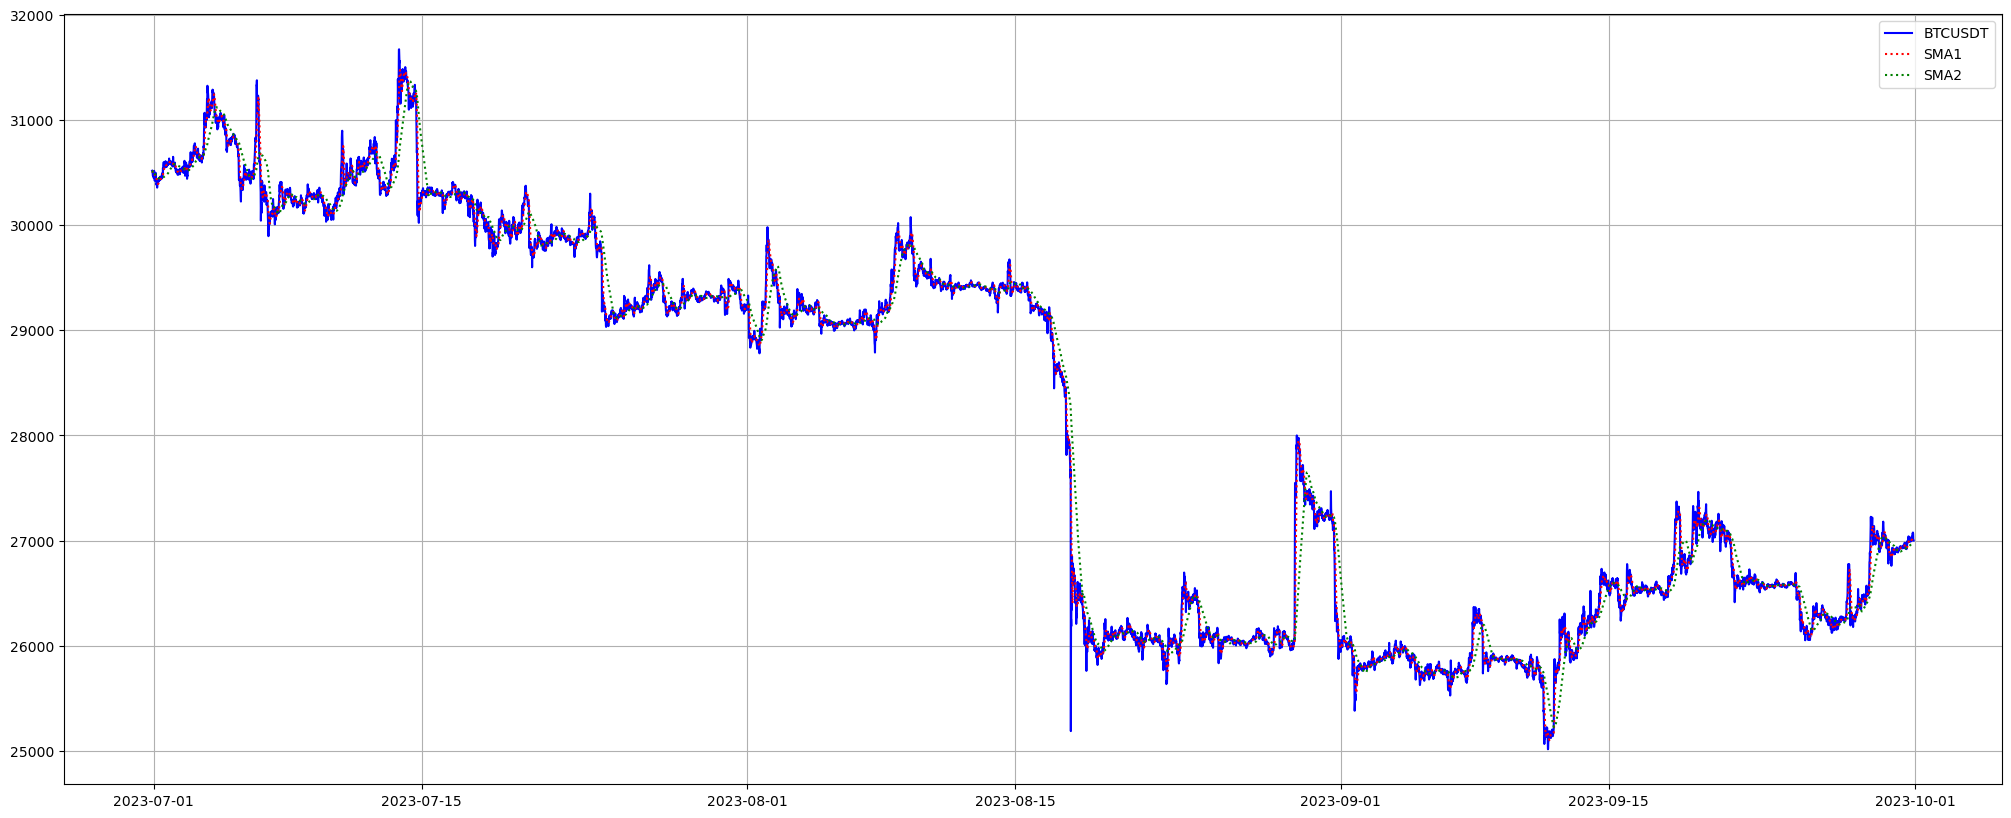

In [10]:
signal_achat = df_eth[df_eth['signal'] > 0]

plt.figure(figsize=(25,10))
plt.plot(df_eth['date'], df_eth['CANDLESTICKES:close'], label='BTCUSDT', color='b', linestyle='-',   linewidth=1.5)
plt.plot(df_eth['date'], df_eth['SMA1'], label='SMA1', color='r', linestyle=':')
plt.plot(df_eth['date'], df_eth['SMA2'], label='SMA2', color='g', linestyle=':')
#plt.scatter(signal_achat['date'], signal_achat['CANDLESTICKES:close'],  marker='v', color='r')
plt.xlabel = 'Année 2020'
plt.ylabel = 'prix'
plt.title = 'Evolution'
plt.legend()
plt.grid(True)
plt.show()